# Introducing CNNS with TensorFlow

## Load libraries

In [1]:
# data tools
import os
import numpy as np
import matplotlib.pyplot as plt

# sklearn tools
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

# tf tools
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, 
                                     MaxPooling2D, 
                                     Activation, 
                                     Flatten, 
                                     Dense)
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K

__Define plotting function__

In [2]:
def plot_history(H, epochs):
    plt.style.use("seaborn-colorblind")

    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss", linestyle=":")
    plt.title("Loss curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.tight_layout()
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc", linestyle=":")
    plt.title("Accuracy curve")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.tight_layout()
    plt.legend()
    plt.show()

__Load cifar10 data__

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 7s 0us/step


In [8]:
X_train = X_train/255
X_test = X_test/255

In [9]:
# create one-hot encodings
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [10]:
# initialize label names for CIFAR-10 dataset
label_names = ["airplane", "automobile", 
              "bird", "cat", 
              "deer", "dog", 
              "frog", "horse", 
              "ship", "truck"]

## ShallowNet 

ShallowNet architecture: </br>
>INPUT => CONV => ReLU => FC

In [23]:
#initalise model
model = Sequential()

# define CONV => ReLU
model.add(Conv2D(32, 
                (3,3),
                padding = "same",
                input_shape = (32, 32, 3)))
model.add(Activation("relu"))
          
# FC classifier
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))

__Compile model__

In [24]:
sgd = SGD(learning_rate =.001)
model.compile(loss="categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

__Model summary__

In [25]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               4194432   
                                                                 
 activation_7 (Activation)   (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
 activation_8 (Activation)   (None, 10)               

__Plot model__

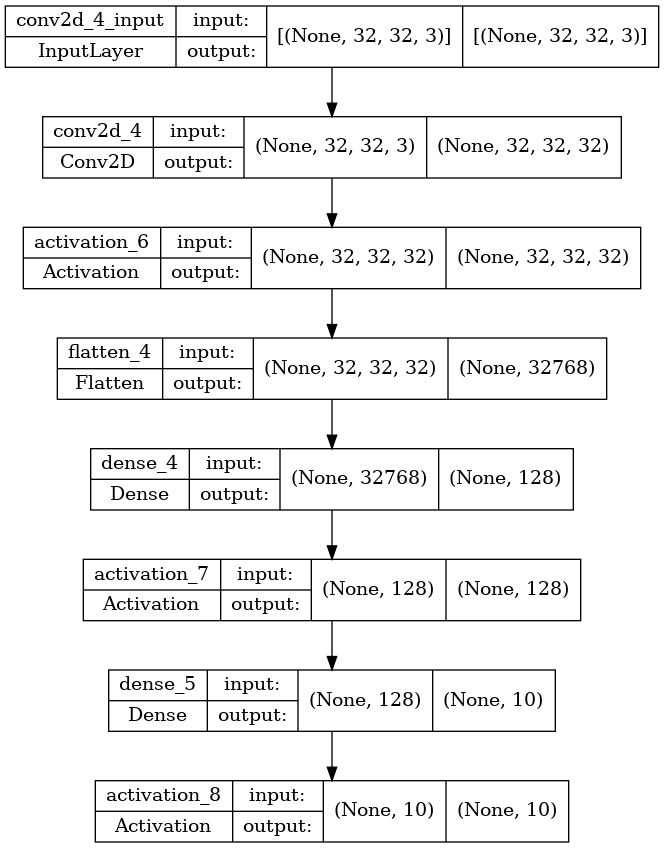

In [26]:
plot_model(model, show_shapes=True, show_layer_names=True)

__Train model__

In [27]:
H = model.fit(X_train, y_train, 
              validation_data=(X_test, y_test), 
              batch_size=32,
              epochs=20,
              verbose=1)

Epoch 1/20
1563/1563 [==============================] - 13s 8ms/step - loss: 2.0690 - accuracy: 0.2681 - val_loss: 1.9191 - val_accuracy: 0.3256
Epoch 2/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.8518 - accuracy: 0.3537 - val_loss: 1.8084 - val_accuracy: 0.3694
Epoch 3/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7792 - accuracy: 0.3766 - val_loss: 1.7560 - val_accuracy: 0.3862
Epoch 4/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.7274 - accuracy: 0.3994 - val_loss: 1.6970 - val_accuracy: 0.4097
Epoch 5/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6865 - accuracy: 0.4115 - val_loss: 1.6742 - val_accuracy: 0.4133
Epoch 6/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6499 - accuracy: 0.4265 - val_loss: 1.6321 - val_accuracy: 0.4266
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6161 - accuracy: 0.4362 - val_loss: 1.5981 - val_ac

__Evaluate model__

In [28]:
predictions = model.predict(X_test, batch_size=32)

In [29]:
print(classification_report(y_test.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=label_names))

              precision    recall  f1-score   support

    airplane       0.57      0.54      0.55      1000
  automobile       0.61      0.69      0.65      1000
        bird       0.50      0.24      0.33      1000
         cat       0.42      0.24      0.31      1000
        deer       0.42      0.47      0.45      1000
         dog       0.54      0.27      0.36      1000
        frog       0.40      0.77      0.53      1000
       horse       0.62      0.54      0.58      1000
        ship       0.52      0.77      0.62      1000
       truck       0.57      0.54      0.56      1000

    accuracy                           0.51     10000
   macro avg       0.52      0.51      0.49     10000
weighted avg       0.52      0.51      0.49     10000



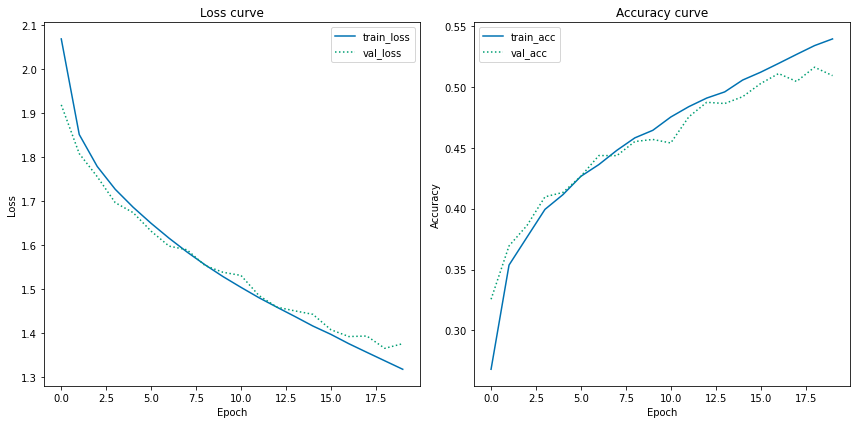

In [30]:
plot_history(H, 20)

## LeNet

LeNet architecture:
>INPUT => CONV => ReLU => MAXPOOL => CONV => ReLU => MAXPOOL => FC => ReLU => FC

__Define model__

In [42]:
# define model
model = Sequential()

# first set of layers CONV => RELU => MAXPOOL
model.add(Conv2D(32, (3,3),
                 padding="same",
                 input_shape=(32,32,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2),
                       strides = (2,2)))

# second set of layers CONV => RELU => MAXPOOL
model.add(Conv2D(50, (5,5),
                 padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2),
                       strides = (2,2)))

# FC => RELU
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

# softmax classifier
model.add(Dense(10))
model.add(Activation("softmax"))

__Compile model__

In [44]:
sgd = SGD(learning_rate=0.001)
model.compile(loss="categorical_crossentropy",
              optimizer=sgd,
              metrics=["accuracy"])

__Model summary__

In [45]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_13 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 50)        40050     
                                                                 
 activation_14 (Activation)  (None, 16, 16, 50)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 50)         0         
 2D)                                                  

__Train model__

In [46]:
# train model
H = model.fit(X_train, y_train, 
              validation_data=(X_test, y_test), 
              batch_size=32,
              epochs=20,
              verbose=1)

Epoch 1/20
1563/1563 [==============================] - 18s 11ms/step - loss: 2.2363 - accuracy: 0.1895 - val_loss: 2.1414 - val_accuracy: 0.2392
Epoch 2/20
1563/1563 [==============================] - 17s 11ms/step - loss: 2.0420 - accuracy: 0.2788 - val_loss: 1.9609 - val_accuracy: 0.3073
Epoch 3/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.9241 - accuracy: 0.3214 - val_loss: 1.8808 - val_accuracy: 0.3387
Epoch 4/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.8409 - accuracy: 0.3531 - val_loss: 1.7882 - val_accuracy: 0.3803
Epoch 5/20
1563/1563 [==============================] - 18s 11ms/step - loss: 1.7548 - accuracy: 0.3863 - val_loss: 1.7030 - val_accuracy: 0.4071
Epoch 6/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6788 - accuracy: 0.4082 - val_loss: 1.6644 - val_accuracy: 0.4099
Epoch 7/20
1563/1563 [==============================] - 17s 11ms/step - loss: 1.6147 - accuracy: 0.4285 - val_loss: 1.5866 -

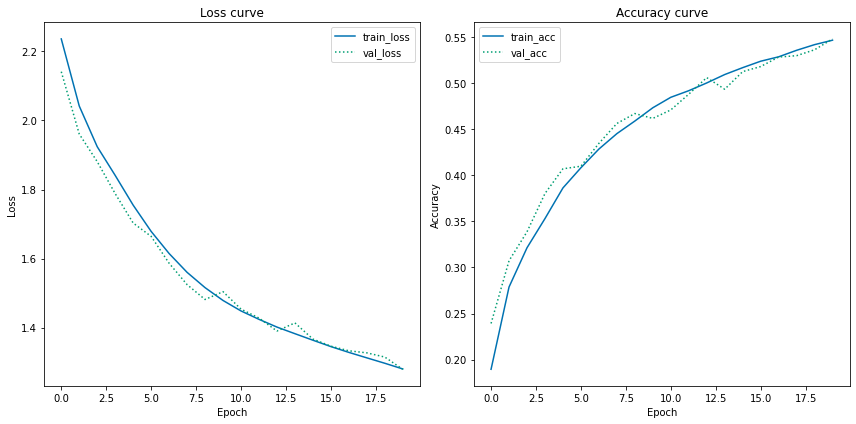

In [47]:
plot_history(H,20)

In [48]:
predictions = model.predict(X_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=label_names))

              precision    recall  f1-score   support

    airplane       0.62      0.58      0.60      1000
  automobile       0.63      0.68      0.65      1000
        bird       0.43      0.42      0.43      1000
         cat       0.41      0.37      0.39      1000
        deer       0.53      0.39      0.45      1000
         dog       0.51      0.42      0.46      1000
        frog       0.62      0.65      0.64      1000
       horse       0.49      0.73      0.58      1000
        ship       0.62      0.68      0.65      1000
       truck       0.61      0.56      0.59      1000

    accuracy                           0.55     10000
   macro avg       0.55      0.55      0.54     10000
weighted avg       0.55      0.55      0.54     10000

